In [ ]:
#Employee Attrition Prediction using logistic regression and random forest classifier

Attrition occurs when the workforce shrinks due to retirements or resignations, and these vacant positions remain unfilled.

### Description about the data

- Age: A period of employee life, measured by years from birth.
- Attrition: The departure of employees from the organization.
- BusinessTravel: Did the employee travel on a business trip or not.
- DailyRate: Employee salary for the period is divided by the amount of calendar days in the period.
- Department: In which department the Employee working.
- DistanceFromHome: How far the Employee live from the office location.
- Education: In education 1 means 'Below College', 2 means 'College', 3 means 'Bachelor', 4 means 'Master', 5 means 'Doctor'
- EducationField: In which field Employee complete his education.
- EmployeeCount: How many employee working in a department
- EmployeeNumber: An Employee Number is a unique number that has been assigned to each current and former State employee and elected official in the Position and Personnel 
DataBase (PPDB).
- Job involvement: Is the degree to which an employee identifies with their work and actively participates in it where 1 means 'Low', 2 means 'Medium', 3 means 'High', 4 means 'Very High'
- JobLevel: Job levels, also known as job grades and classifications, set the responsibility level and expectations of roles at your organization. They may be further defined 
by impact, seniority, knowledge, skills, or job title, and are often associated with a pay band. The way you structure your job levels should be dictated by the needs of your 
unique organization and teams.
- JobRole: What is the jobrole of an employee.
- JobSatisfaction: Employee job satisfaction rate where, 1 means 'Low', 2 means 'Medium', 3 means 'High', 4 means 'Very High'
- MaritalStatus: Marital status of the employee.
- MonthlyIncome: total monetary value paid by the organization to an employee.
- MonthlyRate: The per-day wage of the employee.
- NumCompaniesWorked: Before joining this organization how many organizations employee worked.
- Over18: Is the employee age over than 18 or not.
- OverTime: A Employee works more than 9 hours in any day or for more than 48 hours in any week.
- PercentSalaryHike:
- PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
- EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- StandardHours: Is the number of hours of production time that should have been used during an working period.
- StockOptionLevel:  Employee stock options, also known as ESOs, are stock options in the company’s stock granted by an employer to certain employees. Typically they are  granted to those in management or officer-level positions. Stock options give the employee the right to buy a certain amount of stock at a specific price, during a specific period of time. Options typically have expiration dates as well, by which the options must have been exercised, otherwise they will become worthless.
- TotalWorkingYears: Total years the employee working in any organization
- TrainingTimesLastYear: Last year how many times employee took training session.
- WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'
- YearsAtCompany: How many years the employee working in the current organization
- YearsInCurrentRole: How many years the employee working in the current position
- YearsSinceLastPromotion: How many years the employee working in the current position after promotion
- YearsWithCurrManager: How many years the employee working under the current manager

In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [107]:
data = pd.read_csv('Employee-Attrition.csv')

<h2>Basic Data Exploration</h2>

- This is an Important Step in Data Science and Machine Learning to ensure about the columns, and rows present.
- First, we will check the shape of the dataset
- Second, we will check the head, tail, and sample of the datasets
- Third, we will check the Data Description
- Then, we will check the Data Types of the columns present in the data.

In [108]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [109]:
pd.set_option('display.max_columns',None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [111]:
data.describe() #descriptive statistics

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Observations**
* we only have int and string data types features. there is no feature with float. 26 features are numerical and 9 features are categorical
* Attrition in out target value which has no missing value. But, the quantity of data of emp having Attrition is less compared to employees whoch do not have Attrition. 
- It's very good that we are having a complete dataset, there is no any missing values in dataset.

# Check duplicates

In [112]:
print(data.duplicated().value_counts())
data.drop_duplicates(inplace= True)
print(len(data))

False    1470
Name: count, dtype: int64
1470


# Check missing value

In [113]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

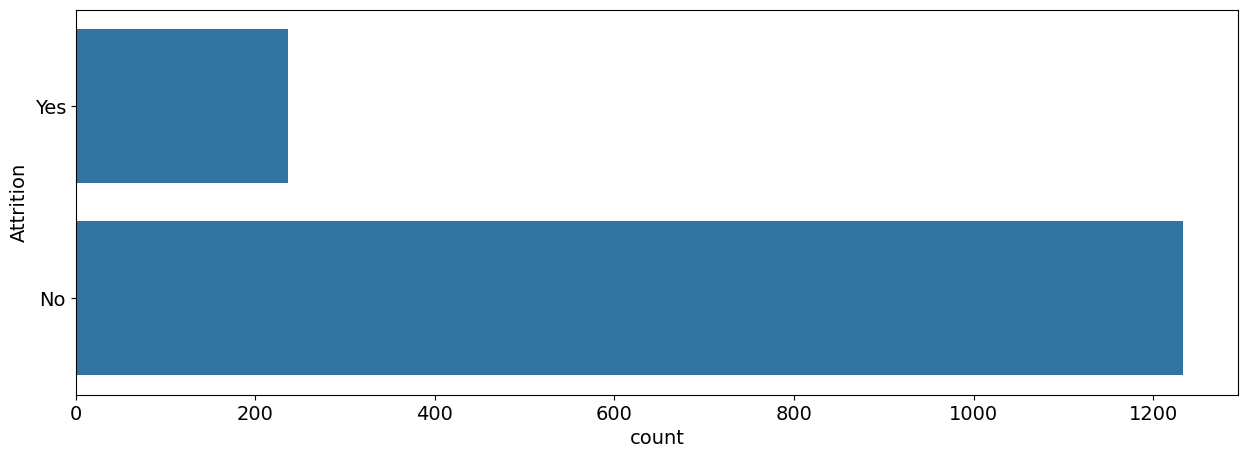

In [114]:
plt.figure(figsize=(15,5))
plt.rc("font",size=14)
sns.countplot(y='Attrition',data = data)
plt.show()

Over here we noticed that the Target column is Highly Imbalanced, we need to balance the data by using some Statistical Methods.

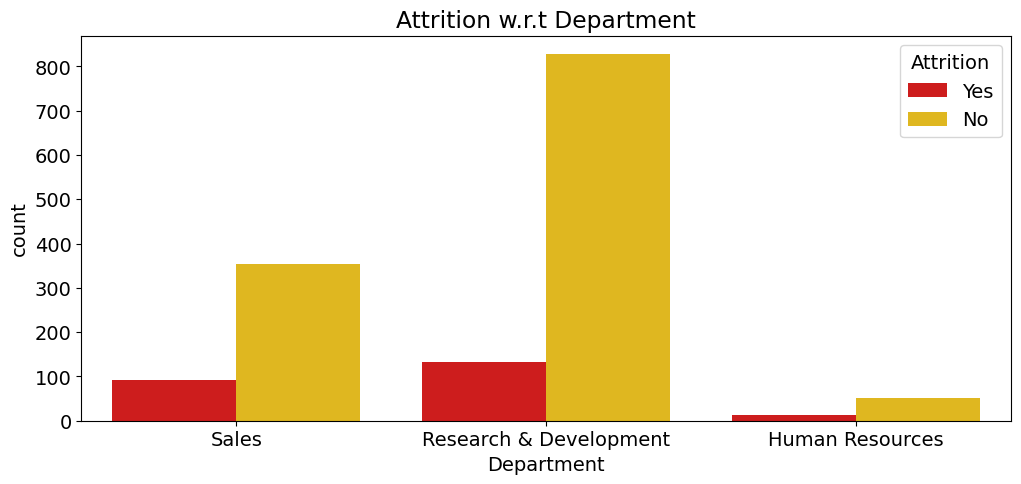

In [115]:
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='Attrition', data=data, palette='hot')
plt.title("Attrition w.r.t Department")
plt.show()

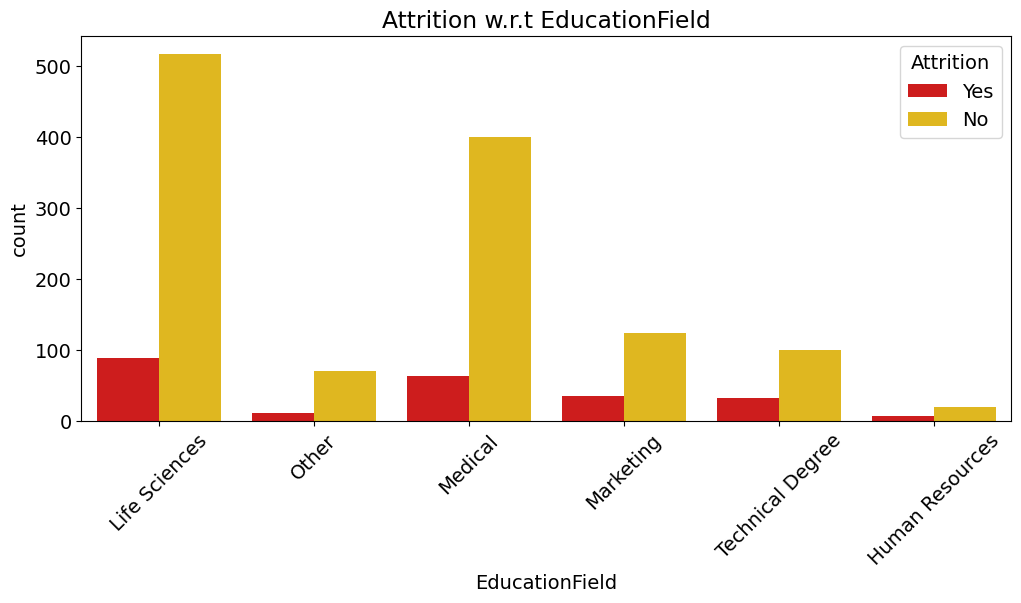

In [116]:

# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField',hue='Attrition', data=data, palette='hot')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

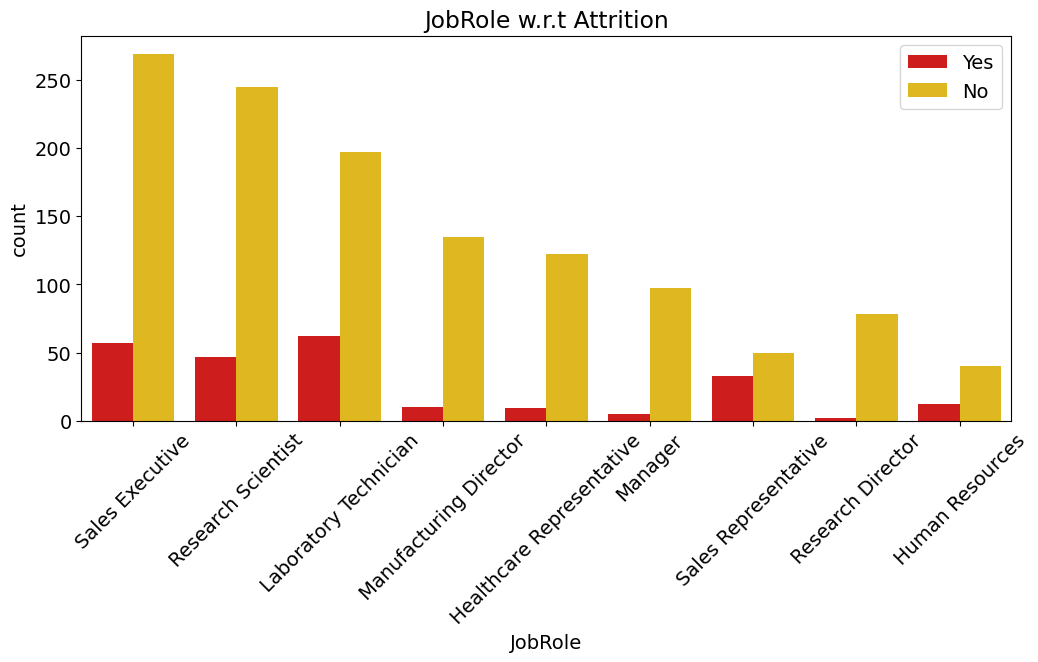

In [117]:
# let's see at which post most people are leaving the jobs
# JobRole
plt.figure(figsize=(12,5))
sns.countplot(x='JobRole',hue='Attrition', data=data, palette='hot')
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

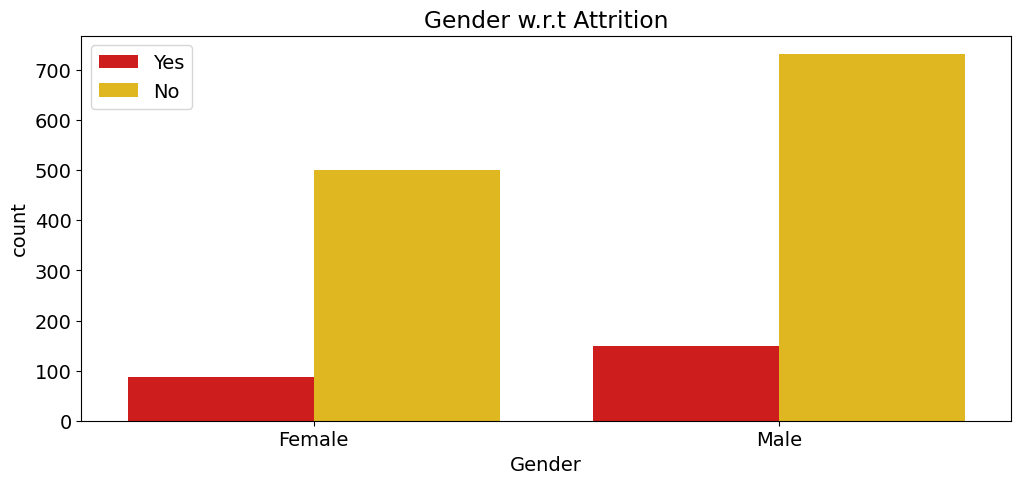

In [118]:
# most male of female employes Attriate
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',hue='Attrition', data=data, palette='hot')
plt.title("Gender w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [119]:
data['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [120]:
data['count'] = 1

In [121]:
data.groupby(["Gender","Attrition"]).agg({"count":"sum"})

count
Gender Attrition       
Female No           501
       Yes           87
Male   No           732
       Yes          150

In [122]:
#manually calculation attrition rate
87*100/(501+87)

14.795918367346939

In [123]:
150*100/(732+150)

17.006802721088434

In [124]:
data.drop(columns=["count"],inplace=True)

**OBSERVATIONS**
- Employees working in R&D department are more, but employees from sales department or at position like sales executive,sale Representative leaves the job early.
- Males are more under Attrition then Females

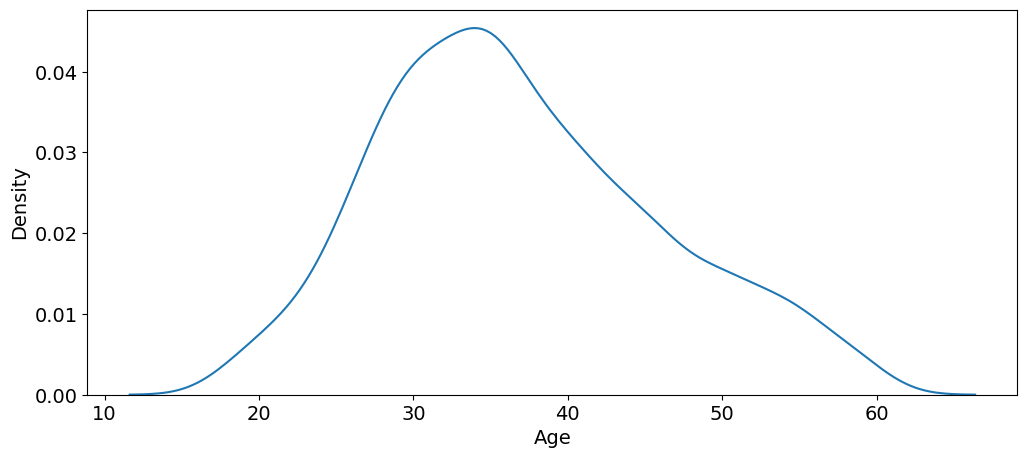

In [125]:
# distribution of age
plt.figure(figsize=(12,5))
sns.distplot(data['Age'],hist=False)
plt.show()

* Age column is very well normalized, most of employees are age between 25 to 40.
- we are having some of the numerical columns which are lebel encoded for us, they are ordinal labels, so let's have a look at them first

In [126]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
data[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


2 types of categorical data
ordinal - data that has an order - performance rating - 4 better than 3
Eg: IF data is like good, better , best. we can assign 1, 2,3

Nominal - Colors -red, green, blue - subective categorical data - with no particularly defined order 

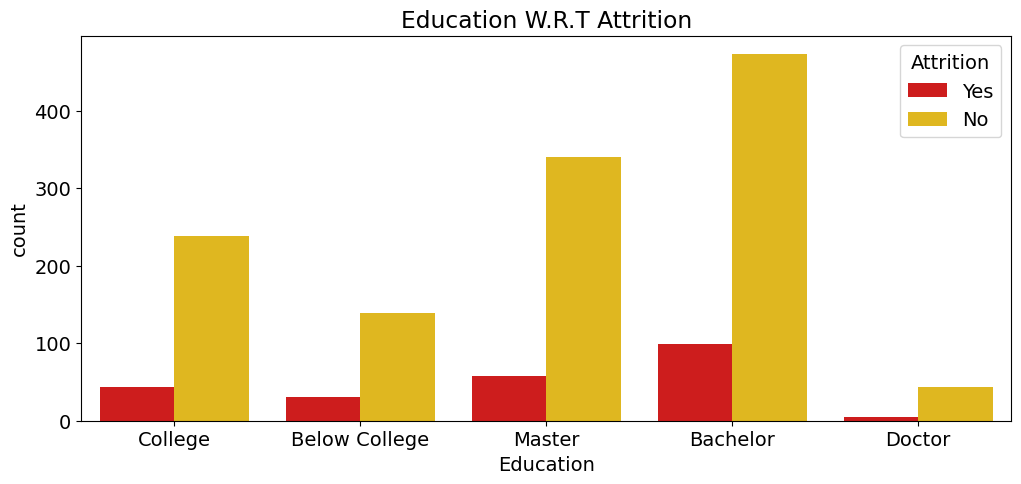

In [127]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(12,5))
sns.countplot(x=data['Education'].map(edu_map), hue='Attrition', data=data, palette='hot')
plt.title("Education W.R.T Attrition")
plt.show()

## Label Encodeing 

In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words.

In [128]:
# Target Variable(Attrition)
data['Attrition'] = data['Attrition'].replace({'No':0,'Yes':1})

In [129]:
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [130]:
#encode binary variables
data['OverTime'] = data['OverTime'].map({'No':0,'Yes':1})
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})

data['Over18'] = data['Over18'].map({'N':0,'Y':1})


In [131]:
#!pip install scikit-learn

In [132]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\Python311\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn


In [133]:
import sklearn

In [134]:
# encode categorical columns which are ordinal, use labelEncoding
# apply Label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoders = {}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [135]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,1,94,3,2,7,4,2,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,0,61,2,2,6,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,0,92,2,1,2,3,2,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,1,56,3,1,6,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,0,40,3,1,2,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

## Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [137]:
X = data.drop(['Attrition'],axis = 1) #input features
y = data['Attrition'].values #output features

Should we over sample the minority class or should we undersample the majority class

2 possible outputs ->
Attrition (10%)
NO attr (90%)

To balance this data
we can increase 10% to 90% - oversampling->when we have smaller dataset, we dont want to lose the information we already have
we can reduce 90% to 0% - undersampling -when we have lots of data, because we can afford to lose some data 

# Resampling
Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. These terms are used both in statistical sampling, survey design methodology and in machine learning. Oversampling and undersampling are opposite and roughly equivalent techniques
- We are going to use Over Sampling.
- We will not use Under Sampling to avoid data loss.

In [138]:
!pip install imblearn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:
import imblearn

In [140]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus = RandomOverSampler(random_state = 42)
X_over, y_over = rus.fit_resample(X,y)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


In [141]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [142]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1972, 34)
(1972,)
(494, 34)
(494,)


# Logistic Regression in Machine Learning

Logistic Regression is used for predicting a category, specially the Binary categories(Yes/No , 0/1).

For example, whether to approve a loan or not (Yes/No)? Which group does this customer belong to (Silver/Gold/Platinum)? etc.

When there are only two outcomes in Target Variable it is known as Binomial Logistic Regression.

If there are more than two outcomes in Target Variable it is known as Multinomial Logistic Regression.

If the outcomes in Target Variable are ordinal and there is a natural ordering in the values (eg. Small< Medium< Large) then it is known as Ordinal Logistic Regression.
</br>
<a href="https://ibb.co/k33M6Ys"><img src="https://i.ibb.co/pWWnrCB/image-12.png" alt="image-12" border="0"></a>
</br>
Logistic regression is based on logit function logit(x) = log(x / (1 – x))

The output is a value between 0 to 1. It is the probability of an event’s occurrence.

E.g. There is an 80% chance that the loan application is good, approve it.

The coefficients β0, β1, β2, β3… are found using Maximum Likelihood Estimation Technique. Basically, if the Target Variable’s value (y) is 1, then the probability of one “P(1)” should be as close to 1 as possible and the probability of zero “P(0)” should be as close to 0 as possible. Find those coefficients which satisfy both the conditions.

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [144]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [145]:
prediction=logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,prediction)
print("Accuracy Score -", accuracy_score(y_test , prediction))

Accuracy Score - 0.6417004048582996


Text(153.22222222222223, 0.5, 'Expected')

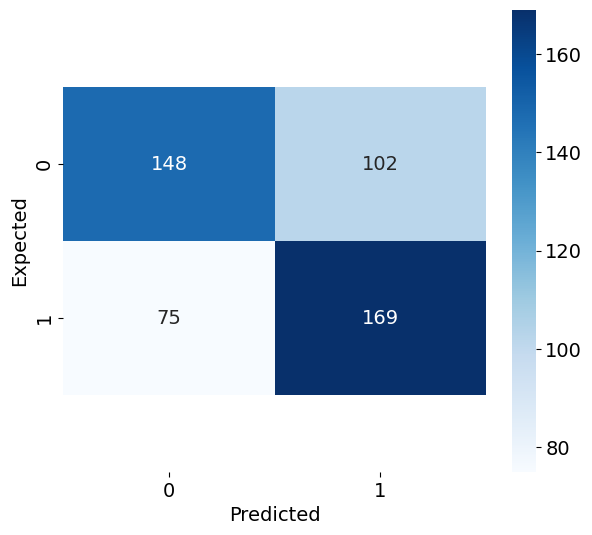

In [146]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')



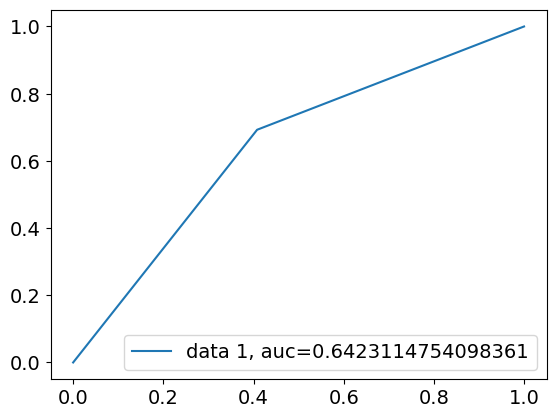

In [147]:
ax2 = fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  prediction)
auc = roc_auc_score(y_test, prediction)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Model Development 
### Using Random forest 

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
Random_forest_model = RandomForestClassifier()

### Model Training

In [150]:
Random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [151]:
y_pred = Random_forest_model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

### Model Evalution

In [152]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[237  13]
 [  8 236]]


<Axes: >

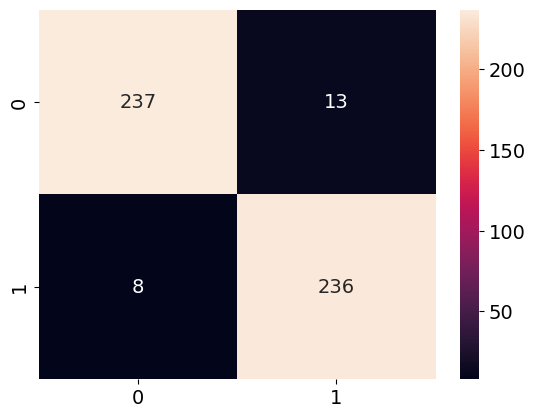

In [153]:
sns.heatmap(cm,annot = True,fmt ='d')

In [154]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


model_accuracy = accuracy_score(y_test,y_pred)
model_precision = precision_score(y_test,y_pred)
model_recall = recall_score(y_test,y_pred)
model_f1score = f1_score(y_test,y_pred)

print("Accuracy : ", model_accuracy)
print("Precision : ",model_precision)
print("Recall : ",model_recall)
print("F1score : ",model_f1score)



Accuracy :  0.9574898785425101
Precision :  0.9477911646586346
Recall :  0.9672131147540983
F1score :  0.9574036511156186


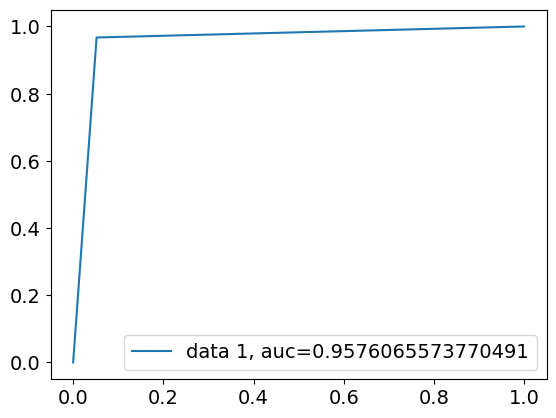

In [155]:
ax2 = fig.add_subplot(1,2,2)
y_pred_proba = Random_forest_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Feature importance/Feature Extraction

In [156]:
score_list = Random_forest_model.feature_importances_
list_of_features = list(X.columns)
score_df = pd.DataFrame({"Feature" : list_of_features,'Score' : score_list})
score_df.sort_values(by="Score",ascending=False)

,Feature,Score
17,MonthlyIncome,0.082458
21,OverTime,0.058099
0,Age,0.053965
8,EmployeeNumber,0.049741
30,YearsAtCompany,0.046491
18,MonthlyRate,0.044554
2,DailyRate,0.044482
27,TotalWorkingYears,0.042879
11,HourlyRate,0.042443
26,StockOptionLevel,0.041344


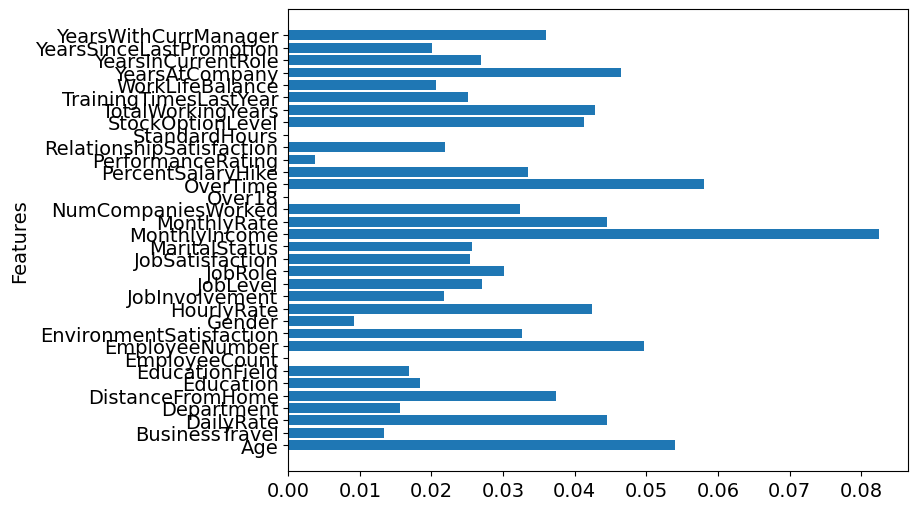

In [158]:
list_of_features=list(X.columns)
plt.figure(figsize = (8,6))
plt.barh(range(len(list_of_features)),Random_forest_model.feature_importances_)
plt.yticks(np.arange(len(list_of_features)),list_of_features)
plt.ylabel('Features')
plt.show()

### K-fold cross validation

In [159]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model,X_train,y_train,cv = 5, scoring= 'accuracy')
print('Cross validation scores = ',scores)

Cross validation scores =  [0.98987342 0.95949367 0.96446701 0.96446701 0.94923858]


In [162]:
Avg_model_score = scores.mean()
print("Average Model Score  = " ,Avg_model_score)

Average Model Score  =  0.9655079354880163


### Hyper parameter tuning

Grid search CV | Random Search CV

In [163]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [164]:
parameters ={
    'n_estimators' : [50,100],
    'max_features' : ['sqrt','log2',None]
}

In [165]:
grid_search = GridSearchCV(estimator=Random_forest_model,param_grid=parameters)

In [166]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [167]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [168]:
Random_forest_model_new = RandomForestClassifier(max_features='sqrt',n_estimators=100)

In [170]:
Random_forest_model_new.fit(X_train,y_train)

RandomForestClassifier()

In [171]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model_new,X_train,y_train,cv=5,scoring='accuracy')
print('Cross-validation scores = ',scores)

Cross-validation scores =  [0.98227848 0.94936709 0.96954315 0.96446701 0.95685279]


In [173]:
Avg_model_score = scores.mean()
print("Average score after hyper tuning  : ", Avg_model_score)

Average score after hyper tuning  :  0.964501702756538
